In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import sklearn
import tarfile
from six.moves import urllib
import sklearn.linear_model
import os 

In [2]:
DATA_PATH = "data/"
oecd_bli = pd.read_csv (DATA_PATH + "oecd_bli_2015.csv", thousands = ',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot (index="Country", columns="Indicator", values="Value")
oecd_bli.head (2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,55206.0,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0


In [3]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.1
Austria      7.2
Belgium      6.8
Brazil       6.1
Canada       7.0
Name: Life satisfaction, dtype: float64

In [4]:
GDP_per_capita = pd.read_csv (DATA_PATH + "GDP_per_capita.csv", thousands = ',', delimiter = '\t', encoding = 'latin1', na_values = "n/a")
GDP_per_capita.rename (columns = {"2015": "GDP per capita"}, inplace = True)
GDP_per_capita.set_index ("Country", inplace = True)
GDP_per_capita.head (2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [5]:
country_stats = pd.merge (left = oecd_bli, right = GDP_per_capita, left_index = True, right_index = True)
country_stats.sort_values (by = "GDP per capita", inplace = True)
country_stats

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,28.5,35.9,48.0,15.4,39.0,40.0,13.7,9338.0,NaN,18.1,...,NaN,66.0,72.0,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Colombia,22.6,12.3,59.0,23.7,58.0,50.0,23.1,NaN,NaN,NaN,...,NaN,53.0,82.0,14.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6083.510,2014.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,80.0,70.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,20.3,25.9,42.0,27.0,59.0,42.0,26.8,16269.0,NaN,17.8,...,NaN,63.0,75.0,15.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,11.8,13.8,95.0,0.1,70.0,64.0,4.8,19546.0,NaN,17.4,...,NaN,68.0,62.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Costa Rica,17.5,2.3,43.0,22.0,55.0,47.0,10.0,16517.0,NaN,17.0,...,NaN,66.0,87.0,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",10936.243,2011.0
Hungary,16.7,3.5,86.0,1.5,70.0,74.0,0.9,21026.0,150296.0,19.9,...,15.08,70.0,81.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,22.8,2.3,93.0,4.2,69.0,71.0,0.5,23675.0,233221.0,21.2,...,14.68,68.0,82.0,18.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,23.4,9.4,67.0,7.7,56.0,41.0,2.4,NaN,135787.0,18.4,...,NaN,47.0,62.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0


[[6.37505658]]


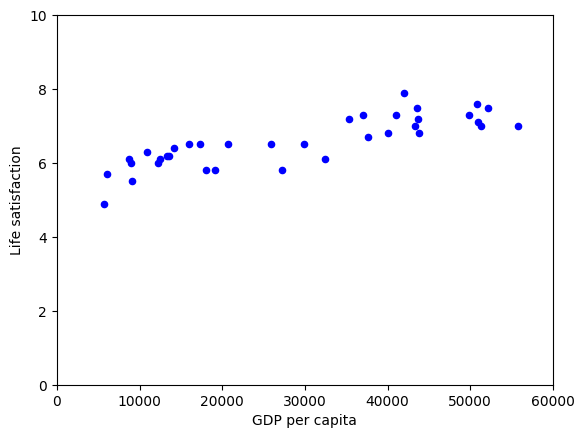

In [6]:
#oecd_bli = pd.read_csv (DATA_PATH + "oecd_bli_2015.csv", thousands = ',')
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot (kind = 'scatter', x = "GDP per capita", y = "Life satisfaction", color = 'blue')
model = sklearn.linear_model.LinearRegression ()
model.fit(x, y)


#predict new/ train model/ test model
x_new = [[22587]]
print (model.predict(x_new))
plt.axis ([0, 60000, 0, 10])
plt.show ()

In [7]:
# study single country or two..
country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.000
Name: United States, dtype: float64